# **KPMG Data Analytics Virtual Internship**

## Task 2
### Data Insights

    Targeting high value customers based on customer demographics and attributes.

#### Here is our task
For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration, Model Development, and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

# Data Exploration

## Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.24.2
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


## Read Dataset

In [4]:
data = pd.read_excel('AllCustomerList.xlsx')

In [5]:
# Display a few rows
data.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,age_class
3649,3854,Melody,Ivanilov,Female,47,1996-01-16,VP Quality Control,Property,High Net Worth,0,1,2,341 Katie Junction,4817,QLD,Australia,4,27,30
3844,4058,Marylou,Kirkup,Female,51,1972-10-31,VP Product Management,Unknown,Mass Customer,0,0,14,76733 Sunbrook Terrace,3196,VIC,Australia,9,50,50
2914,3072,Roma,Prettjohn,Male,87,1979-04-12,Chemical Engineer,Manufacturing,Mass Customer,0,1,10,6269 Oak Valley Avenue,2323,NSW,Australia,5,44,40
80,88,Malynda,Tumber,Female,41,1966-02-03,Help Desk Operator,Property,High Net Worth,0,1,7,5 Grim Center,2069,NSW,Australia,12,57,60
1227,1298,Guglielmo,Yele,Male,35,1974-04-06,Research Nurse,Health,Mass Customer,0,0,16,029 Scott Center,4205,QLD,Australia,5,49,50


## 1. Exploratory Data Analysis

### 1.1. Dimensions of the DataFrame

In [6]:
# Dimensions of the DataFrame
data.shape

(4770, 19)

In [7]:
print('Total rows: {}'.format(data.shape[0]))
print('Total cols: {}'.format(data.shape[1]))

Total rows: 4770
Total cols: 19


### 1.2. Data Types of the Columns

In [8]:
# Data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4770 non-null   int64         
 1   first_name                           4770 non-null   object        
 2   last_name                            4770 non-null   object        
 3   gender                               4770 non-null   object        
 4   past_3_years_bike_related_purchases  4770 non-null   int64         
 5   DOB                                  4770 non-null   datetime64[ns]
 6   job_title                            4770 non-null   object        
 7   job_industry_category                4770 non-null   object        
 8   wealth_segment                       4770 non-null   object        
 9   deceased_indicator                   4770 non-null   int64         
 10  owns_car    

- The `past_3_years_bike_related_purchases` column will be renamed to `purchases_number`.
- The `postcode` column is categorical data, rather than numerical data, so it should be converted to string data type.

In [9]:
data.rename(columns={'past_3_years_bike_related_purchases': 'purchases_number'}, inplace=True)

In [10]:
data['postcode'] = data['postcode'].astype(str)

### 1.3. Detect Missing Data

In [11]:
# Detect missing value
data.isna().sum().sum()

0

### 1.4. Detect Duplicated Data

In [12]:
# Detect duplicated value
data.duplicated().sum()

0

### 1.5. Descriptive Statistics

#### 1.5.0. Define Features

In [13]:
# Define features
num = data.select_dtypes(exclude=['object']).drop('customer_id', axis=1)
cat = data.select_dtypes(include=['object'])

In [14]:
num.shape[1]

8

In [15]:
cat.shape[1]

10

#### 1.5.1. Numerical Features

In [16]:
# Summary statistics for numerical features
num.describe().T

,count,mean,min,25%,50%,75%,max,std
purchases_number,4770.0,49.146751,0.0,24.0,49.0,73.0,99.0,28.568845
DOB,4770,1976-03-29 02:24:54.339622656,1931-10-23 00:00:00,1965-12-13 12:00:00,1976-11-04 12:00:00,1986-10-11 12:00:00,2002-03-11 00:00:00,NaN
deceased_indicator,4770.0,0.000419,0.0,0.0,0.0,0.0,1.0,0.020474
owns_car,4770.0,0.503145,0.0,0.0,1.0,1.0,1.0,0.500043
tenure,4770.0,10.833543,1.0,6.0,11.0,15.0,22.0,5.539387
property_valuation,4770.0,7.492662,1.0,6.0,8.0,10.0,12.0,2.809393
age,4770.0,46.619497,21.0,36.0,46.0,57.0,91.0,13.88187
age_class,4770.0,46.42348,20.0,40.0,50.0,60.0,90.0,14.381675


In [17]:
num.describe().loc[['mean', '50%']].T

,mean,50%
purchases_number,49.146751,49.0
DOB,1976-03-29 02:24:54.339622656,1976-11-04 12:00:00
deceased_indicator,0.000419,0.0
owns_car,0.503145,1.0
tenure,10.833543,11.0
property_valuation,7.492662,8.0
age,46.619497,46.0
age_class,46.42348,50.0


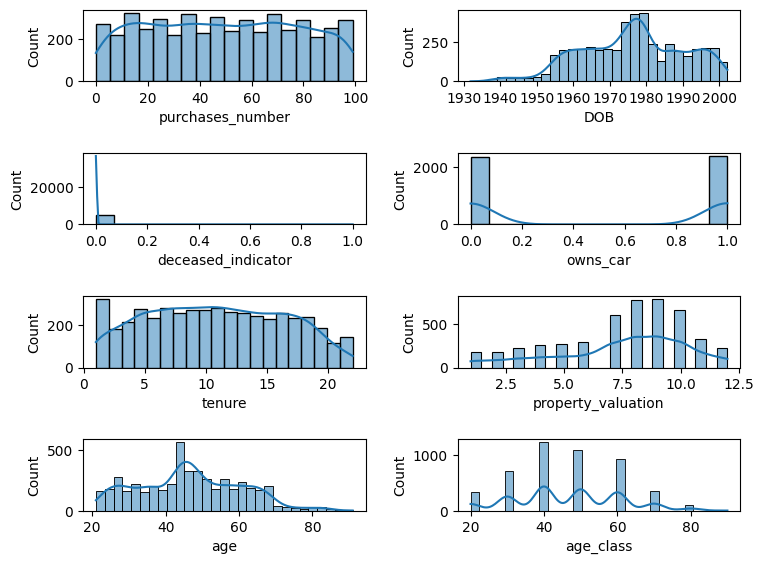

In [18]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(4, 2, i[0] + 1)
    sns.histplot(data[i[1]], kde=True)
    plt.tight_layout(pad=2)

#### 1.5.2. Categorical Features

In [19]:
# Summary statistics for categorical features
cat.describe().T

,count,unique,top,freq
first_name,4770,3604,Tobe,5
last_name,4770,4545,Ramsdell,3
gender,4770,2,Female,2493
job_title,4770,196,Unknown,584
job_industry_category,4770,10,Manufacturing,967
wealth_segment,4770,3,Mass Customer,2397
address,4770,4764,9 Springview Terrace,2
postcode,4770,912,2145,35
state,4770,3,NSW,2520
country,4770,1,Australia,4770


## **2. Data Visualization**

In [20]:
df_num = num.columns
df_cat = cat.columns

### 2.1. Univariate Analysis

#### 2.1.1. Numerical Features

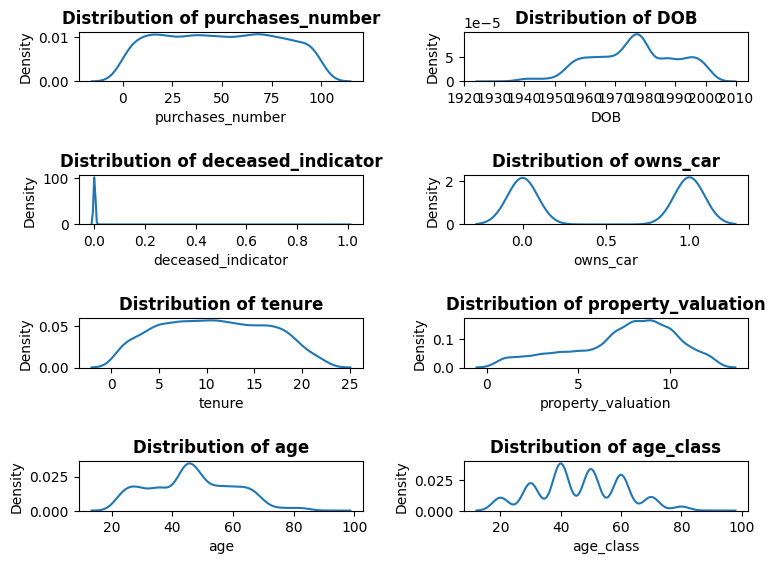

In [21]:
plt.figure(figsize=(8, 6))
for i in range(0, len(df_num)):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(x=data[df_num[i]])
    plt.xlabel(df_num[i])
    plt.title('Distribution of ' + df_num[i],
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)

#### 2.1.2. Categorical Features

In [22]:
# plt.figure(figsize=(8, 6))
# sns.set(style='white', palette='turbo')
# for i in range(0, len(df_cat)):
#     plt.subplot(5, 2, i + 1)
#     sns.countplot(x=data[df_cat[i]])
#     plt.xticks(rotation=90)
#     plt.title('Distribution of ' + df_cat[i],
#               fontsize=12,
#               fontweight='bold')
#     plt.tight_layout(pad=2)

### 2.2. Bivariate Analysis

In [23]:
# plt.figure(figsize=(8, 6))
# sns.set(style='white', palette='turbo')
# for i in range(0, len(df_cat)):
#     plt.subplot(5, 2, i + 1)
#     sns.countplot(x=data[df_cat[i]],
#                  hue='deceased_indicator')
#     plt.xticks(rotation=90)
#     plt.title(f'{df_cat[i]} by Deceased Indicator',
#               fontsize=12,
#               fontweight='bold')
#     plt.tight_layout(pad=2)

### 2.3. Multivariate Analysis

<Figure size 800x600 with 0 Axes>

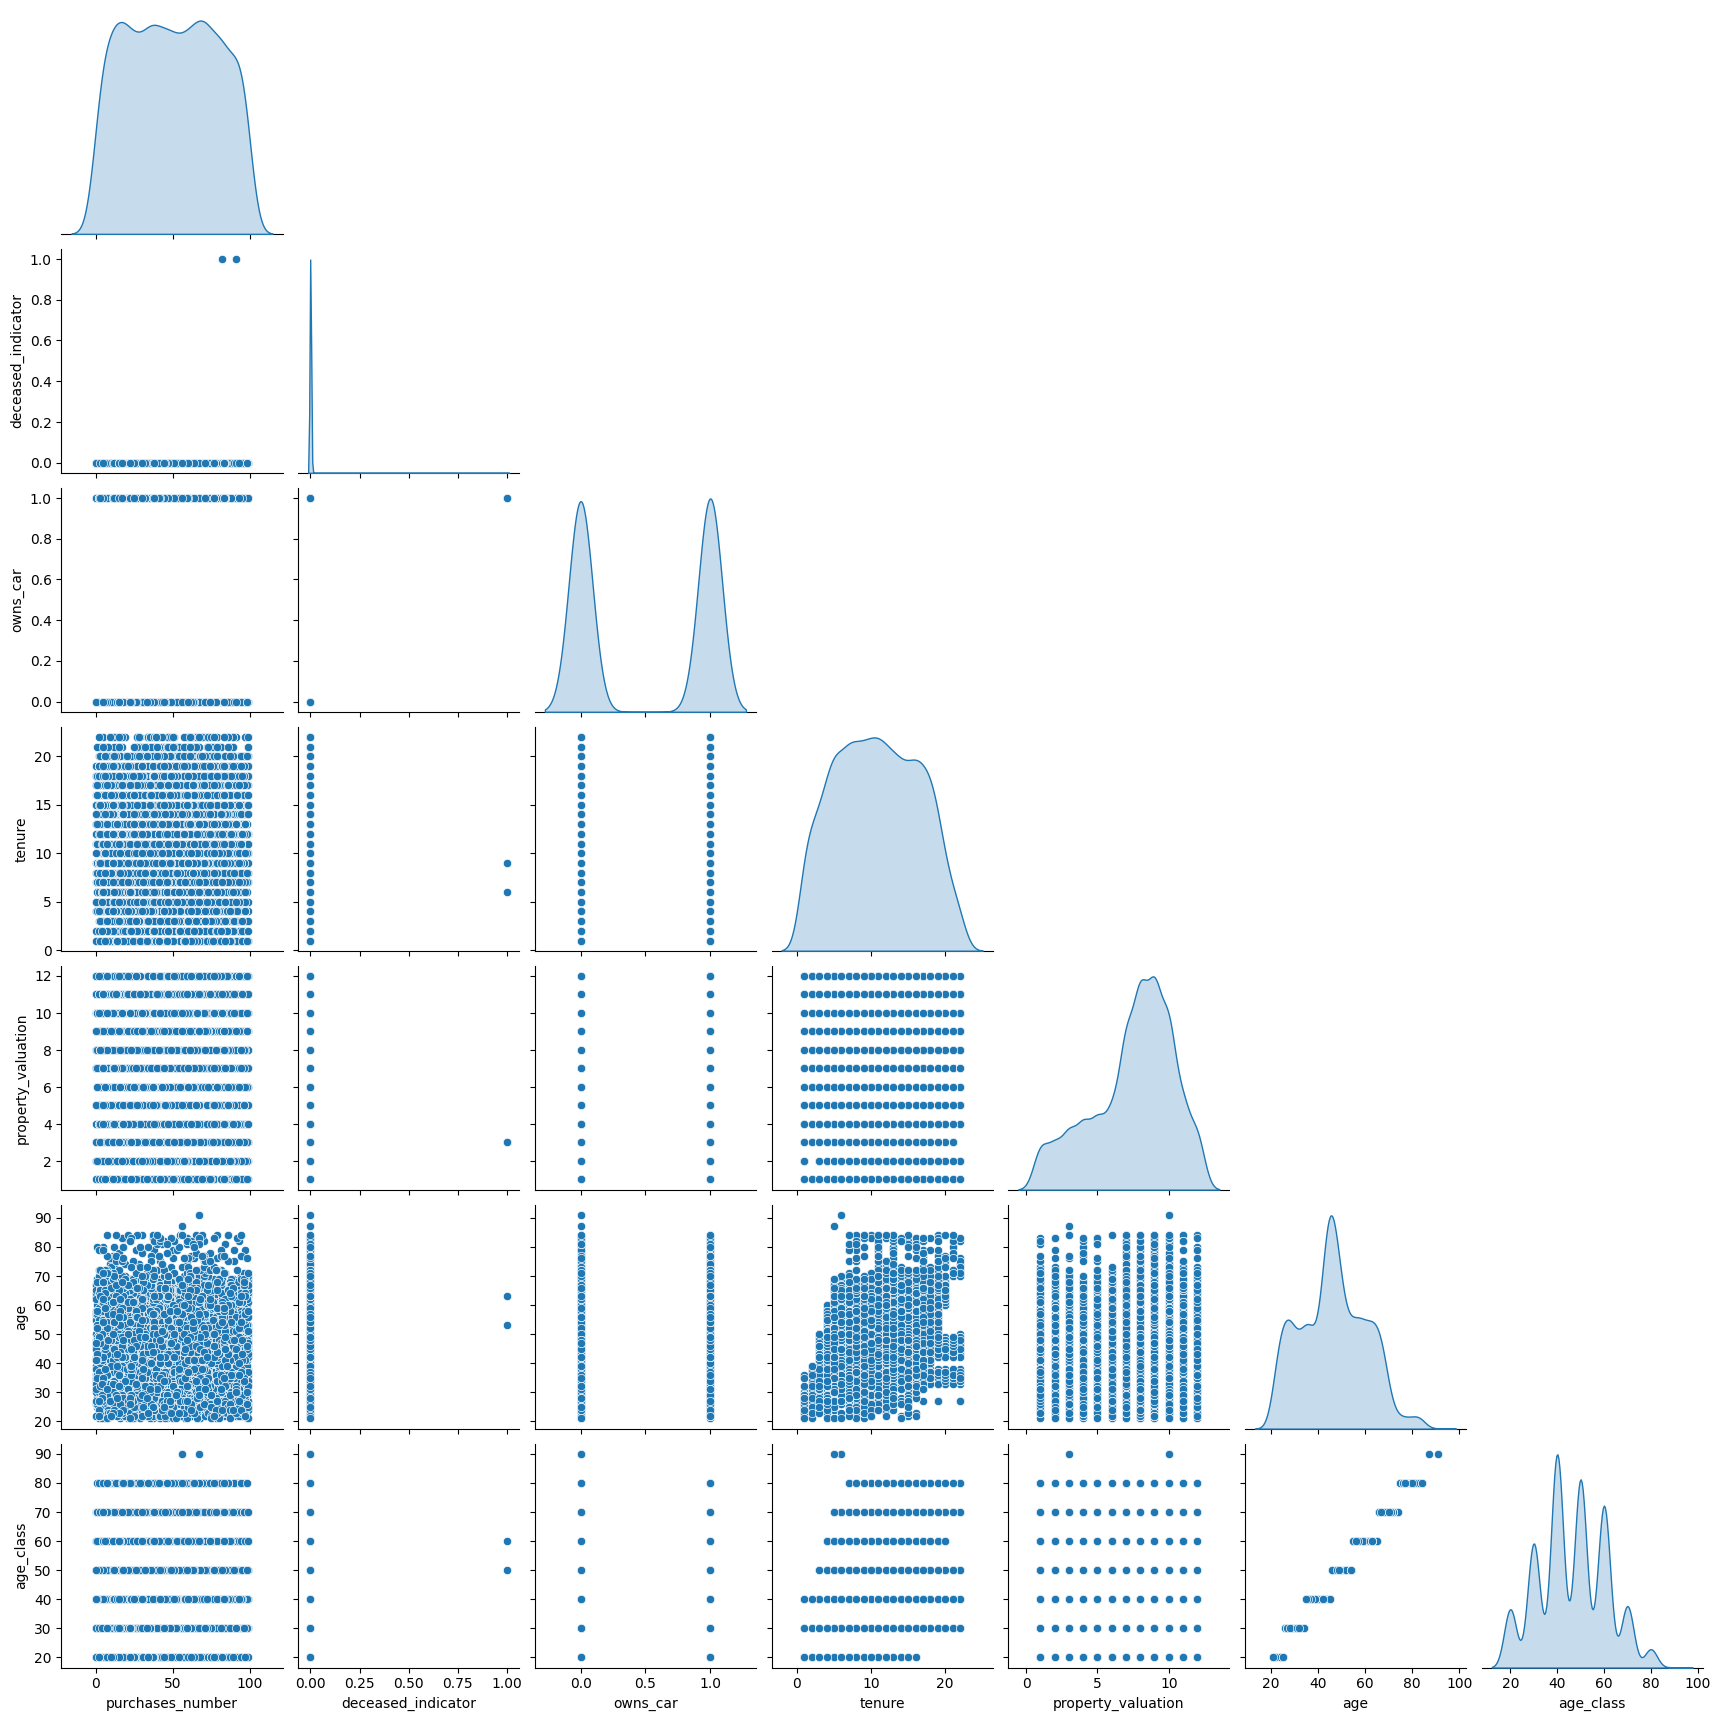

In [24]:
plt.figure(figsize=(8, 6))
sns.pairplot(num, diag_kind='kde', corner=True)

#### Correlations for the different numerical features

In [25]:
corrs = num.corr()
corrs.reset_index().rename(columns={'index' : 'Feature Name'})

,Feature Name,purchases_number,DOB,deceased_indicator,owns_car,tenure,property_valuation,age,age_class
0,purchases_number,1.000000,0.025228,0.026781,-0.007680,-0.019662,0.002676,-0.025243,-0.025521
1,DOB,0.025228,1.000000,-0.016907,-0.010944,-0.403112,-0.002188,-0.999787,-0.976393
2,deceased_indicator,0.026781,-0.016907,1.000000,0.020352,-0.012326,-0.032755,0.016792,0.012215
3,owns_car,-0.007680,-0.010944,0.020352,1.000000,-0.004429,0.017704,0.010549,0.009728
4,tenure,-0.019662,-0.403112,-0.012326,-0.004429,1.000000,-0.009308,0.403477,0.399658
5,property_valuation,0.002676,-0.002188,-0.032755,0.017704,-0.009308,1.000000,0.002334,0.003658
6,age,-0.025243,-0.999787,0.016792,0.010549,0.403477,0.002334,1.000000,0.976614
7,age_class,-0.025521,-0.976393,0.012215,0.009728,0.399658,0.003658,0.976614,1.000000


#### Heatmap of the correlations

Text(0.5, 1.0, 'Correlation Matrix')

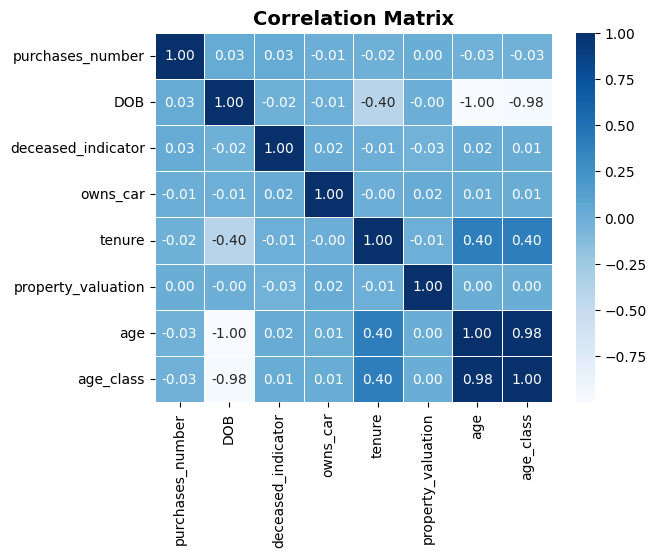

In [26]:
sns.heatmap(data=corrs,
            cmap='Blues',
            annot=True,
            fmt='.2f',
            linewidths=0.5)
plt.title(label='Correlation Matrix',
          fontsize=14,
          fontweight='bold')

## **3. Insights**

In [27]:
c = data.groupby(['gender'])['purchases_number'].sum().rename('count').to_frame()
c

,count
gender,
Female,120833
Male,113597


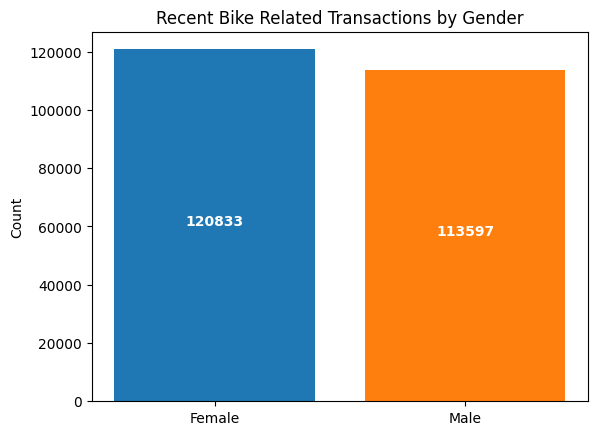

In [28]:
labels = ['Female', 'Male']
count = c['count']
plt.bar(labels, count, color=['#1f77b4', '#ff7f0e'])
for i, v in enumerate(count):
    plt.text(i, v / 2, str(v), ha='center', color='white', fontweight='bold')
plt.title('Recent Bike Related Transactions by Gender')
plt.ylabel('Count')
plt.show()

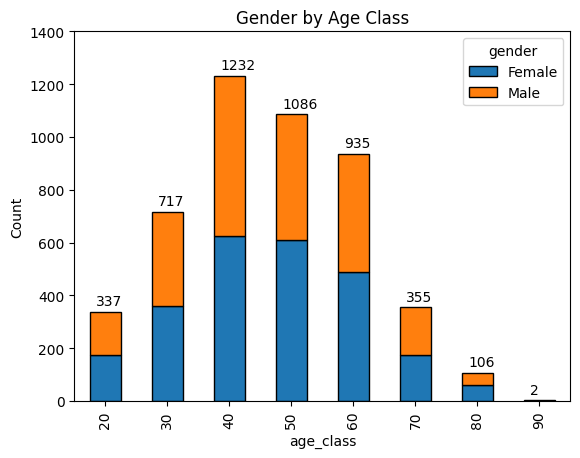

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# group by age class and gender, and count the number of transactions
age_gender_count = data.groupby(['age_class', 'gender']).size().reset_index(name='count')

# pivot the data to create a stacked bar chart
age_gender_count = age_gender_count.pivot(index='age_class', columns='gender', values='count')

# create stacked bar chart using seaborn
ax = age_gender_count.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

# add title and y-axis label
plt.title('Gender by Age Class')
plt.ylabel('Count')

# set y-axis limit
ax.set_ylim([0, 1400])

# add annotations to the chart
for i, v in enumerate(data.groupby('age_class').agg({'gender': lambda x: len(x)})['gender']):
    ax.text(i - 0.15, v + 25, int(v), color='black')

# display the chart
plt.show()

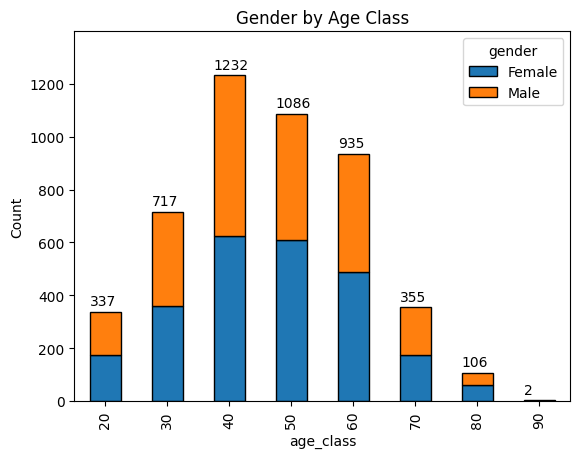

In [30]:
data.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True, edgecolor='black')
for i, v in enumerate(data.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1399])
plt.title('Gender by Age Class')
plt.ylabel('Count')
plt.show()

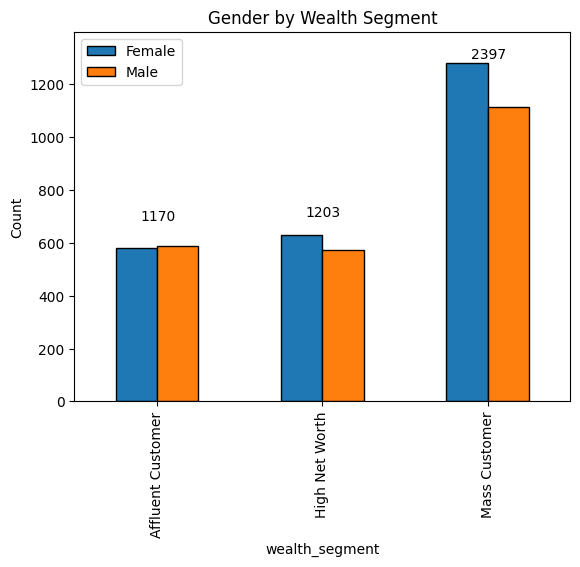

In [31]:
data.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False, edgecolor='black')
for i, v in enumerate(data.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 100, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1399])
plt.title('Gender by Wealth Segment')
plt.ylabel('Count')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

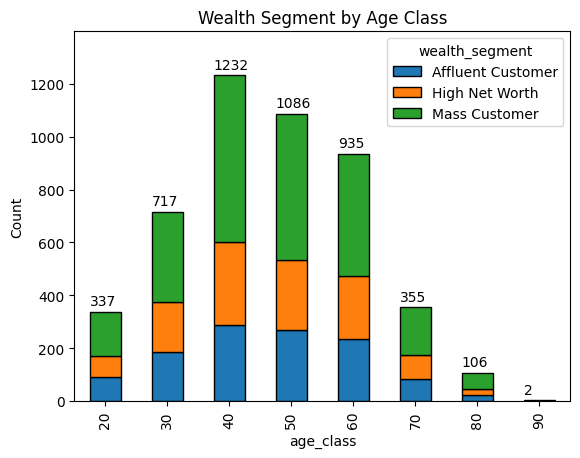

In [32]:
data.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True, edgecolor='black')
for i, v in enumerate(data.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1399])
plt.title('Wealth Segment by Age Class')
plt.ylabel('Count')
plt.show()

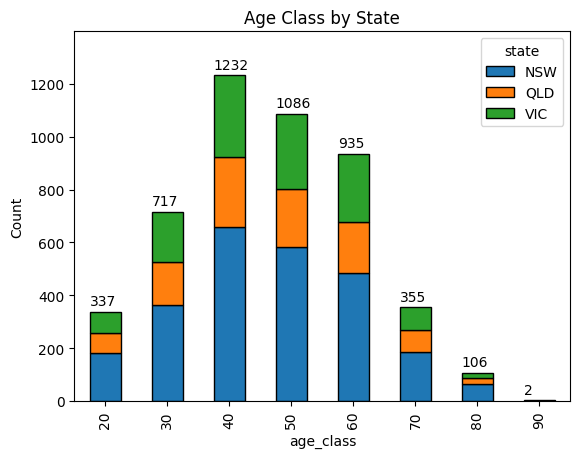

In [33]:
data.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True, edgecolor='black')
for i, v in enumerate(data.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1399])
plt.title('Age Class by State')
plt.ylabel('Count')
plt.show()

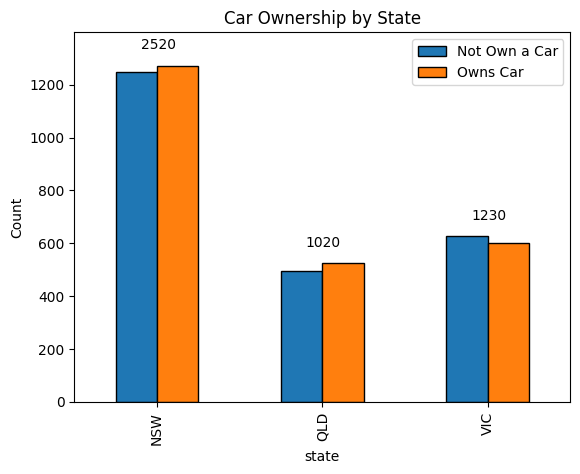

In [34]:
data.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False, edgecolor='black')
for i, v in enumerate(data.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 75, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1399])
plt.title('Car Ownership by State')
plt.ylabel('Count')
plt.legend(['Not Own a Car', 'Owns Car'])
plt.show()

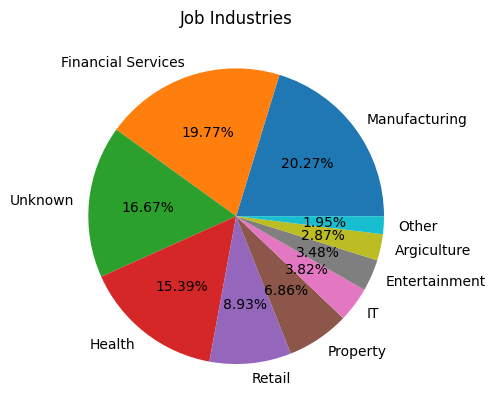

In [35]:
# Set threshold to 2.5%
threshold = 0.025
category = data['job_industry_category'].value_counts(normalize=True)
small_categories = category[category < threshold].index.tolist()
data['job_industry_category'].replace(small_categories, 'Other', inplace=True)

# Set color palette
palette = sns.color_palette('tab10', len(data['job_industry_category'].value_counts()))

# Plot pie chart
data['job_industry_category'].value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%', colors=palette)
plt.title('Job Industries')
plt.ylabel('')
plt.show()

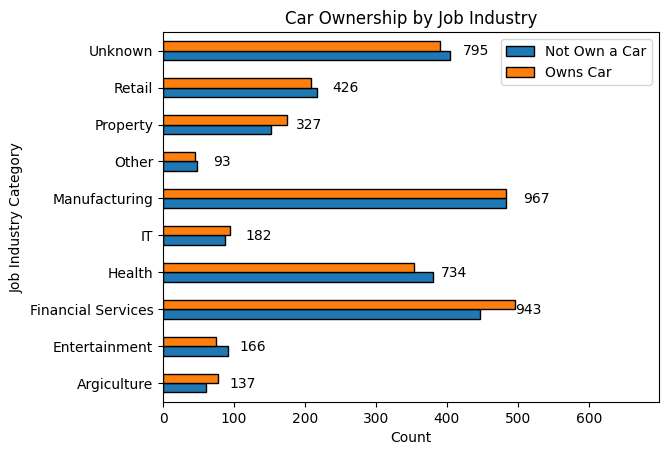

In [36]:
data.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False, edgecolor='black')
for i, v in enumerate(data.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 25, i - .125, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0, 699])
plt.title('Car Ownership by Job Industry')
plt.xlabel('Count')
plt.ylabel('Job Industry Category')
plt.legend(['Not Own a Car', 'Owns Car'], loc='upper right')
plt.show()